### Context

YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset is a daily record of the top trending YouTube videos.

For more info [Trending YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new).

> ### Summary

> With YouTube almost considered as a necessity for people of the Internet, They rush over to go through whom, and what's interesting be it songs, controversies, their favorite artists, funny videos and something to let time pass by.

> With the limit of the dataset only being from November of 2017 and July of 2018, underneath are general data from the EDA and for more information you can scroll down further.




<div>
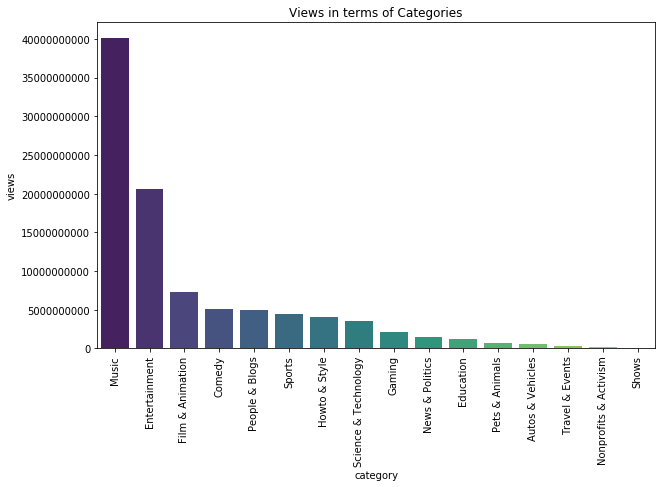
</div>
<div>
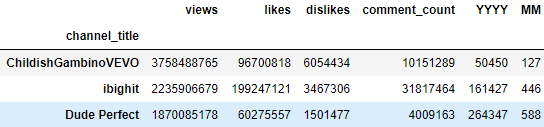
</div>
<div>
<table>
    <tr>
        <td>
            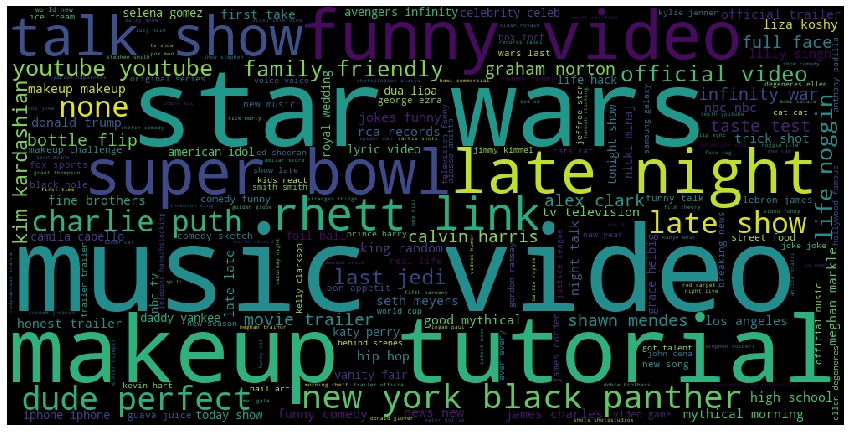
        </td>
        <td>
            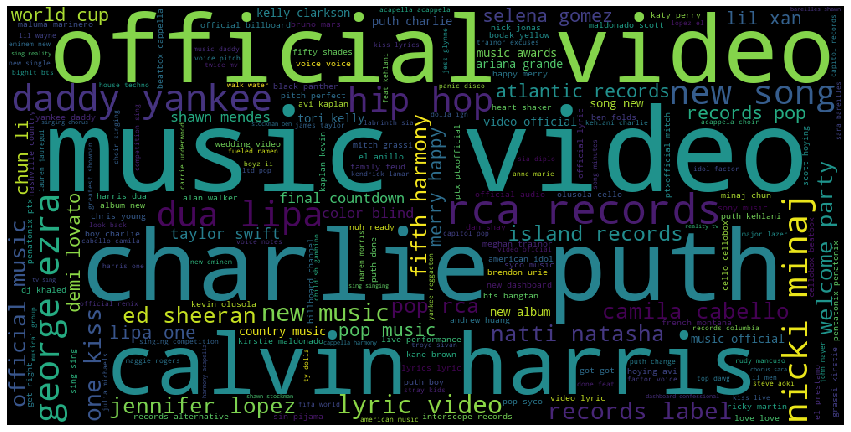
        </td>
    </tr>
</table>
<table>
    <tr>
        <td>
            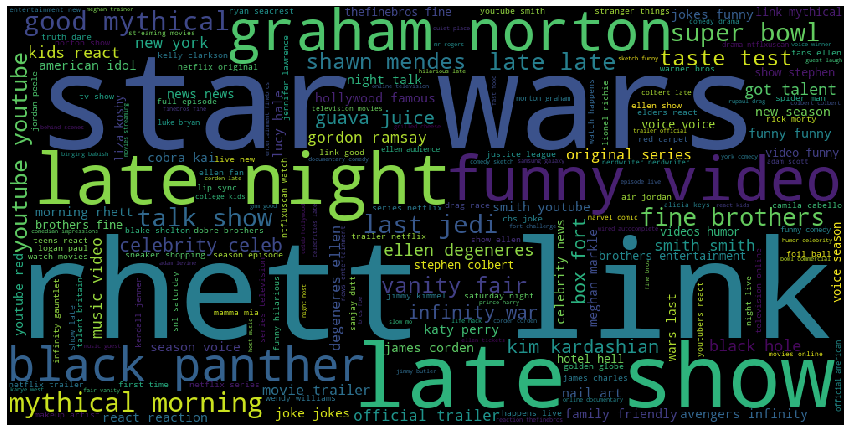
        </td>
        <td>
            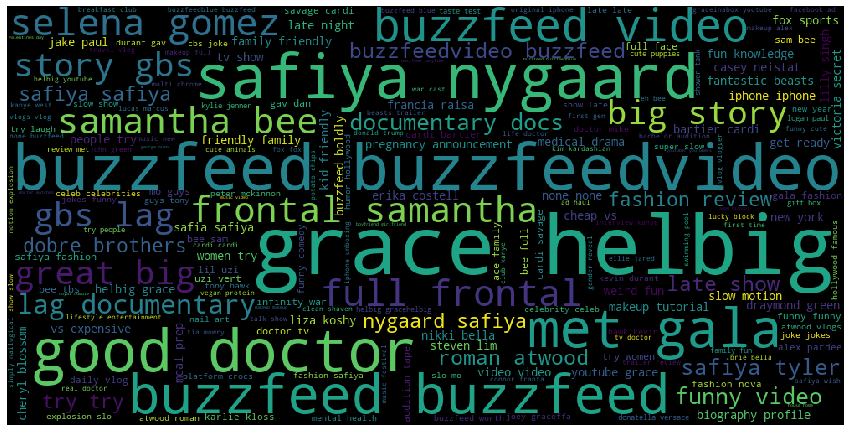
        </td>
    </tr>
</table>
<div>


#### Importing of Libraries and Preparing the Dataset

In [255]:
import os
import gc
import time
import re
from tqdm.notebook import tqdm as tqdm

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.utils import shuffle

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML, display

%matplotlib inline

#### Reading the dataset

In [69]:
us_df = pd.read_csv('us_df.csv')

In [58]:
us_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [243]:
us_df.corr()

,views,likes,dislikes,comment_count,YYYY,MM
views,1.000000,0.849177,0.472213,0.617621,0.079671,-0.011039
likes,0.849177,1.000000,0.447186,0.803057,0.064615,-0.003915
dislikes,0.472213,0.447186,1.000000,0.700184,0.013134,0.004055
comment_count,0.617621,0.803057,0.700184,1.000000,0.039043,-0.005004
YYYY,0.079671,0.064615,0.013134,0.039043,1.000000,-0.927730
MM,-0.011039,-0.003915,0.004055,-0.005004,-0.927730,1.000000


Firstly by reading and understanding the json file we can acquire the categories per ID

In [70]:
def view_per_columnname(column_name):
    views_per_column = us_df['views'].groupby(us_df[column_name]).sum()
    views_per_column = pd.DataFrame(views_per_column)
    final = views_per_column.reset_index()
    return final

### Explaratory Data Analysis

We then split the data on how much and how far our data really is, I've split the data for each year to see how much total distribution of views in terms of months and years.

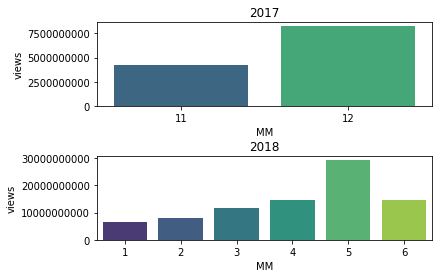

In [164]:
fig, (axis1,axis2) = plt.subplots(2, 1)
plt.subplots_adjust(hspace=.6)

axis1.ticklabel_format(style='plain')
axis1.set_title('2017')
axis2.ticklabel_format(style='plain')
axis2.set_title('2018')

sns.barplot(x='MM',y='views',data=view_per_columnname('MM')[6:], palette='viridis', ci=None, ax=axis1)
sns.barplot(x='MM',y='views',data=view_per_columnname('MM')[:6], palette='viridis', ci=None, ax=axis2)

In [74]:
view_per_columnname('YYYY')

,YYYY,views
0,2017,12444002210
1,2018,84227767942


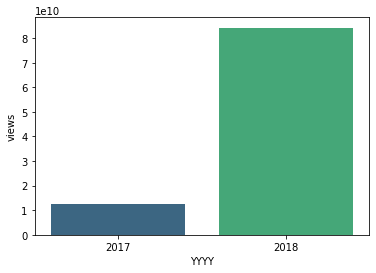

In [166]:
sns.barplot(x='YYYY',y='views',data=view_per_columnname('YYYY'), palette='viridis', ci=None)

In [76]:
cat = view_per_columnname('category').sort_values(by='views', ascending=False)

Now on to the exciting and general parts of the EDA, in here we could see each category with in connection with their views. With <b>Music, Entertainment, Films and Animation, People and Blogs</b> as the top five trending categories.

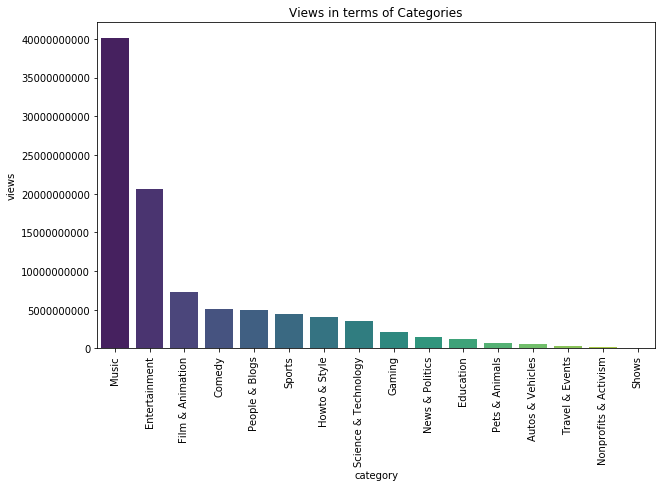

In [248]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style='plain')

chart = sns.barplot(x='category',y='views',data=cat, palette='viridis', ci=None)
chart.set_title('Views in terms of Categories')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.savefig('Views in terms of Categories.png', bbox_inches='tight')
plt.show()

Now onto the specifics, We'll look onto the top three per categories

In [259]:
us_df.groupby('channel_title').sum().sort_values(by='views',ascending=False).head(3)

,views,likes,dislikes,comment_count,YYYY,MM
channel_title,,,,,,
ChildishGambinoVEVO,3758488765,96700818,6054434,10151289,50450,127
ibighit,2235906679,199247121,3467306,31817464,161427,446
Dude Perfect,1870085178,60275557,1501477,4009163,264347,588


In [229]:
def gettop3(category):
    top3df = us_df[us_df['category']==category]
    res = top3df.groupby('channel_title').sum().sort_values(by='views',ascending=False)
    

    return res.head(3)

In [230]:
gettop3('Music')

,views,likes,dislikes,comment_count,YYYY,MM
channel_title,,,,,,
ChildishGambinoVEVO,3758488765,96700818,6054434,10151289,50450,127
ibighit,2235906679,199247121,3467306,31817464,161427,446
ArianaGrandeVevo,1576959172,52170970,1931230,4295333,86774,219


In [231]:
gettop3('Entertainment')

,views,likes,dislikes,comment_count,YYYY,MM
channel_title,,,,,,
Marvel Entertainment,1806126076,55800680,1025928,6435231,236094,478
Sony Pictures Entertainment,1432374398,30106808,1414686,3533551,177561,515
FoxStarHindi,1238609854,23762509,910745,1782776,64576,168


In [234]:
gettop3('Film & Animation')

,views,likes,dislikes,comment_count,YYYY,MM
channel_title,,,,,,
20th Century Fox,1082872611,24419452,488761,1509224,272389,839
Disney•Pixar,826815182,13623208,449099,1410747,80710,210
Selena Gomez,818792483,20165850,346079,1002366,56504,149


In [235]:
gettop3('Comedy')

,views,likes,dislikes,comment_count,YYYY,MM
channel_title,,,,,,
Bad Lip Reading,476570575,14866609,340444,808214,185637,502
Hannah Stocking,441704392,14592635,803656,1071375,205813,561
Lele Pons,380567124,16193116,981427,930475,137201,391


In [242]:
gettop3('People & Blogs')

,views,likes,dislikes,comment_count,YYYY,MM
channel_title,,,,,,
Safiya Nygaard,528434394,25344263,350015,4419873,280476,734
Kylie Jenner,461064419,0,0,0,20180,20
BuzzFeedVideo,318914886,7297046,495757,824879,338992,863


In [37]:
corpus = []
for i in tqdm(range(0,40881)):   
    tags = re.sub('[^a-zA-Z]', ' ', us_df['tags'][i])
    tags = tags.lower()
    tags = tags.split()
    tags = [word for word in tags if not word in set(stopwords.words('english'))]
    tags = ' '.join(tags)
    corpus.append(tags)

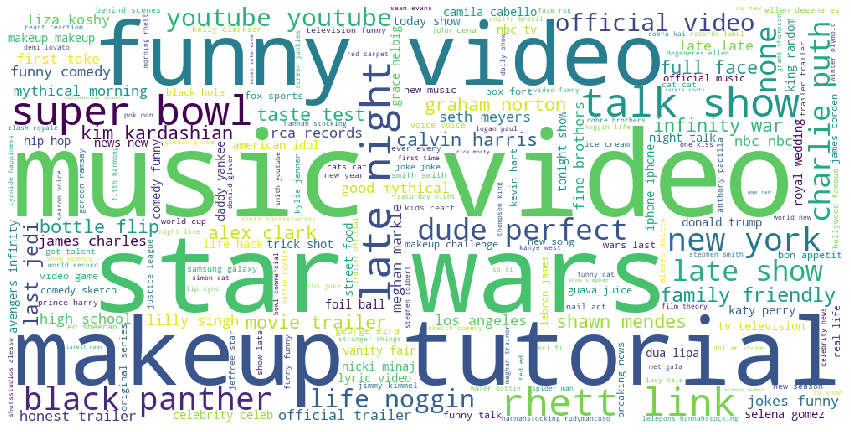

In [260]:
unique_string=(" ").join(corpus)
wordcloud = WordCloud(background_color='white', width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("General"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [249]:
def getBagofWords(category):
    cat = us_df[us_df['category']==category]['tags'].reset_index()
    countlist = len(cat)
    corpus = []
    for i in tqdm(range(0,countlist)):   
        tags = re.sub('[^a-zA-Z]', ' ', cat['tags'][i])
        tags = tags.lower()
        tags = tags.split()
        tags = [word for word in tags if not word in set(stopwords.words('english'))]
        tags = ' '.join(tags)
        corpus.append(tags)
        
    unique_string=(" ").join(corpus)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig(category+".png", bbox_inches='tight')
    
    return plt.show()    

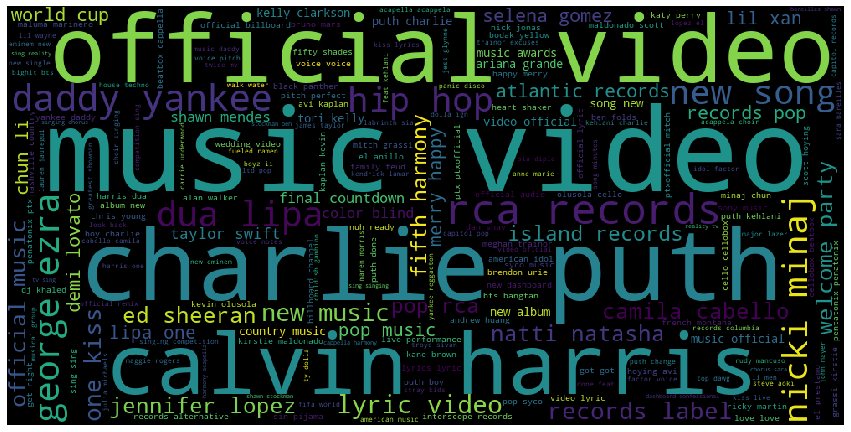

In [250]:
getBagofWords('Music')

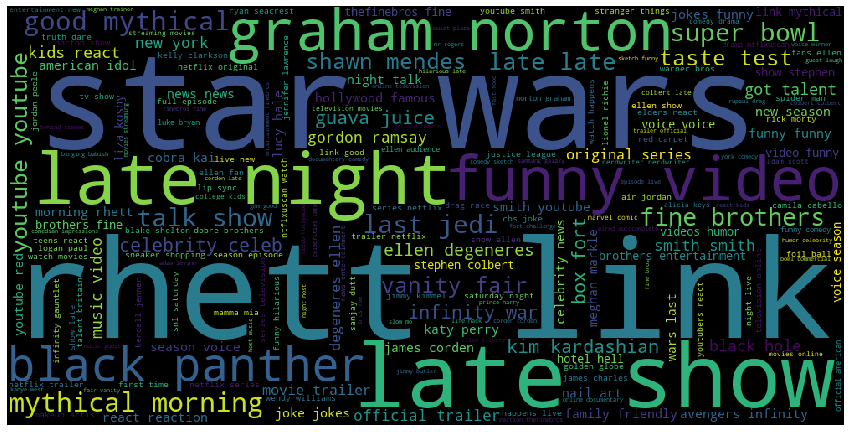

In [251]:
getBagofWords('Entertainment')

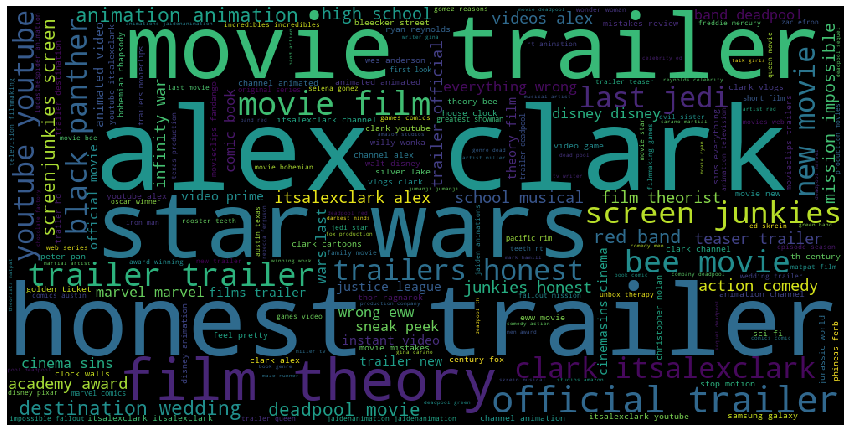

In [252]:
getBagofWords('Film & Animation')

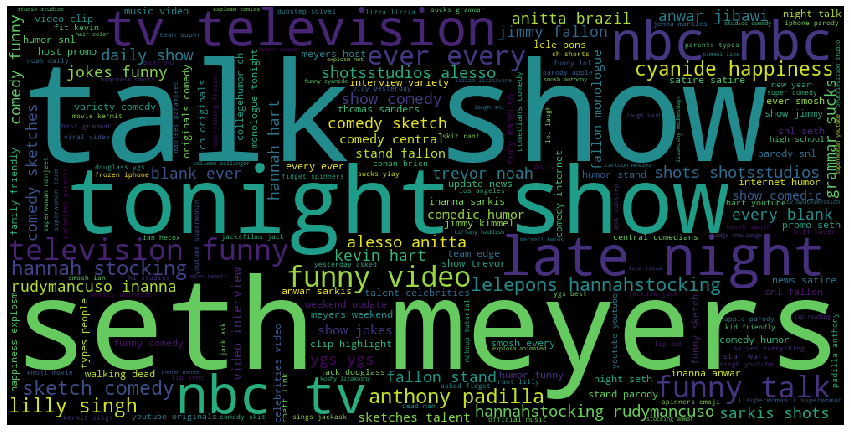

In [253]:
getBagofWords('Comedy')

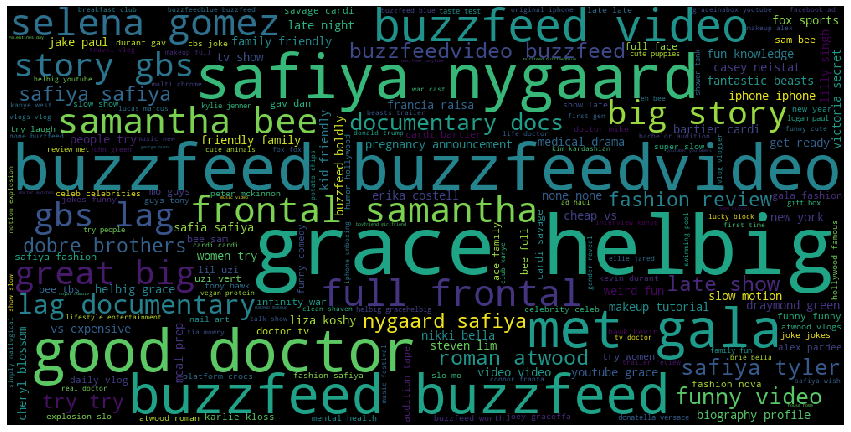

In [254]:
getBagofWords('People & Blogs')

### Reference Points:

- https://www.kaggle.com/datasnaek/youtube-new
- for TQDM - https://github.com/tqdm/tqdm
- https://www.kaggle.com/jpmiller/creating-a-good-analytics-report
- https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/